In [303]:
import pandas as pd
import numpy as np

from numpy import log10
from scipy import stats as st

import matplotlib.pyplot as plt
import seaborn as sea


## Pré-Processamento

 
 

In [2]:
#Trocar o path
movies = pd.read_csv('/home/carolina/Documents/Projeto-If697/datasets/IMDbmovies.csv')


In [3]:
ratings = pd.read_csv('/home/carolina/Documents/Projeto-If697/datasets/IMDbratings.csv')


In [4]:
#juntando os dois dataframes em um único 
movies_ratings = movies.merge(ratings, on='imdb_title_id', how='inner')

## Definição de tipos 

Vamos transformar os dados do tipo "object" em categoricos

In [5]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81273 entries, 0 to 81272
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          81273 non-null  object 
 1   title                  81273 non-null  object 
 2   original_title         81273 non-null  object 
 3   year                   81273 non-null  int64  
 4   date_published         81273 non-null  object 
 5   genre                  81273 non-null  object 
 6   duration               81273 non-null  int64  
 7   country                81234 non-null  object 
 8   language               80518 non-null  object 
 9   director               81200 non-null  object 
 10  writer                 79780 non-null  object 
 11  production_company     76948 non-null  object 
 12  actors                 81207 non-null  object 
 13  description            78843 non-null  object 
 14  avg_vote               81273 non-null  float64
 15  vo

In [6]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81273 entries, 0 to 81272
Data columns (total 49 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   imdb_title_id              81273 non-null  object 
 1   weighted_average_vote      81273 non-null  float64
 2   total_votes                81273 non-null  int64  
 3   mean_vote                  81273 non-null  float64
 4   median_vote                81273 non-null  float64
 5   votes_10                   81273 non-null  int64  
 6   votes_9                    81273 non-null  int64  
 7   votes_8                    81273 non-null  int64  
 8   votes_7                    81273 non-null  int64  
 9   votes_6                    81273 non-null  int64  
 10  votes_5                    81273 non-null  int64  
 11  votes_4                    81273 non-null  int64  
 12  votes_3                    81273 non-null  int64  
 13  votes_2                    81273 non-null  int

In [7]:
#Selecionamos apenas as colunas que tem tipo "object" para transformá-las no tipo "category"
movies_ratings[movies_ratings.select_dtypes(['object']).columns] = movies_ratings.select_dtypes(['object']).apply(lambda x: x.astype('category'))

In [8]:
movies_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81273 entries, 0 to 81272
Data columns (total 70 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   imdb_title_id              81273 non-null  category
 1   title                      81273 non-null  category
 2   original_title             81273 non-null  category
 3   year                       81273 non-null  int64   
 4   date_published             81273 non-null  category
 5   genre                      81273 non-null  category
 6   duration                   81273 non-null  int64   
 7   country                    81234 non-null  category
 8   language                   80518 non-null  category
 9   director                   81200 non-null  category
 10  writer                     79780 non-null  category
 11  production_company         76948 non-null  category
 12  actors                     81207 non-null  category
 13  description                7884

## Tratamento de dados Faltantes

Remoção e Imputação


Temos algumas colunas que possuem mais de 80% de dados faltantes logo remover instâncias com dropna não é uma boa escolha porque removeria quase todos os dados

In [10]:
movies.shape

(81273, 22)

In [11]:
movies1 = movies.dropna()
movies1.shape

(6456, 22)

Se há colunas com mais de 70% de dados faltantes eu posso considerar que elas não são tão relavantes e remover essas colunas.
Nos ratings há as colunas de notas dadas por homens e mulheres menores que 18 anos, essas colunas estão quase vazias com mais de 70%, porém na coluna que mistura os dois gêneros com menos de 18 anos temos um valor faltante um pouco menos de 67%, mas como eu irei retirar as outras duas e 67% também é um valor muito alto irei remover esta também.

Nos filmes temos a informação de renda bruta tanto nos EUA quanto no Mundo, é uma informação que seria boa de observar mas como temos um dataset com filmes bastante antigos e/ou desconhecidos essa informação está faltando em boa parte das colunas, então também decidi removê-la.

No fim a remoção de colunas será feita a partir de 60% dos valores faltantes.


In [12]:
(movies.isnull().sum()/ 81273) *100

imdb_title_id             0.000000
title                     0.000000
original_title            0.000000
year                      0.000000
date_published            0.000000
genre                     0.000000
duration                  0.000000
country                   0.047986
language                  0.928968
director                  0.089821
writer                    1.837018
production_company        5.321571
actors                    0.081208
description               2.989923
avg_vote                  0.000000
votes                     0.000000
budget                   71.941481
usa_gross_income         81.428027
worlwide_gross_income    63.220258
metascore                84.346585
reviews_from_users        8.707689
reviews_from_critics     13.518635
dtype: float64

In [13]:
(ratings.isnull().sum()/ 81273) *100

imdb_title_id                 0.000000
weighted_average_vote         0.000000
total_votes                   0.000000
mean_vote                     0.000000
median_vote                   0.000000
votes_10                      0.000000
votes_9                       0.000000
votes_8                       0.000000
votes_7                       0.000000
votes_6                       0.000000
votes_5                       0.000000
votes_4                       0.000000
votes_3                       0.000000
votes_2                       0.000000
votes_1                       0.000000
allgenders_0age_avg_vote     67.340937
allgenders_0age_votes        67.340937
allgenders_18age_avg_vote     0.510625
allgenders_18age_votes        0.510625
allgenders_30age_avg_vote     0.011074
allgenders_30age_votes        0.011074
allgenders_45age_avg_vote     0.139038
allgenders_45age_votes        0.139038
males_allages_avg_vote        0.001230
males_allages_votes           0.001230
males_0age_avg_vote      

In [14]:
movies_ratings.dropna(thresh=0.6*len(movies_ratings), axis=1, inplace=True)


Para as colunas "reviews from users" e "reviews from critics" com 8% e 13% de dados faltantes respectivamente, eu posso simplesmente subistituí-los por 0 já que as colunas contam o número de reviews para um dado filme

In [15]:
movies_ratings['reviews_from_users'].fillna(0.0, inplace=True)
movies_ratings['reviews_from_critics'].fillna(0.0, inplace=True)


As colunas "votes" e "total_votes" e também "avg_vote" e "weighted_average_vote" são as mesmas porque faziam partes de datasets diferentes, então posso remover uma de cada.

In [16]:
movies_ratings.drop(columns=['total_votes', 'weighted_average_vote'], inplace=True)

Sobraram algumas colunas categóricas com dados faltando, eu vou subistituir esses NaN por "missing" já que eu não tenho nenhuma informação sobre esses dados.


In [17]:

movies_ratings['country'] = movies_ratings['country'].cat.add_categories('Missing')
movies_ratings['language'] = movies_ratings['language'].cat.add_categories('Missing')
movies_ratings['director'] = movies_ratings['director'].cat.add_categories('Missing')
movies_ratings['actors'] = movies_ratings['actors'].cat.add_categories('Missing')
movies_ratings['description'] = movies_ratings['description'].cat.add_categories('Missing')



movies_ratings['country'].fillna("Missing", inplace=True)
movies_ratings['language'].fillna("Missing", inplace=True)
movies_ratings['director'].fillna("Missing", inplace=True)
movies_ratings['actors'].fillna("Missing", inplace=True)
movies_ratings['description'].fillna("Missing", inplace=True)



In [18]:
movies_ratings['writer'] = movies_ratings['writer'].cat.add_categories('Missing')
movies_ratings['production_company'] = movies_ratings['production_company'].cat.add_categories('Missing')

movies_ratings['writer'].fillna("Missing", inplace=True)
movies_ratings['production_company'].fillna("Missing", inplace=True)

In [19]:
(movies_ratings.isnull().sum() / 81273) *100

imdb_title_id                0.000000
title                        0.000000
original_title               0.000000
year                         0.000000
date_published               0.000000
genre                        0.000000
duration                     0.000000
country                      0.000000
language                     0.000000
director                     0.000000
writer                       0.000000
production_company           0.000000
actors                       0.000000
description                  0.000000
avg_vote                     0.000000
votes                        0.000000
reviews_from_users           0.000000
reviews_from_critics         0.000000
mean_vote                    0.000000
median_vote                  0.000000
votes_10                     0.000000
votes_9                      0.000000
votes_8                      0.000000
votes_7                      0.000000
votes_6                      0.000000
votes_5                      0.000000
votes_4     

Agora só sobraram dados faltantes do tipo numérico



As colunas tais como "female_allages_votes" contam o número de notas atribuídas para um dado filme. 
Assim como o número de reviews, não há melhor opção do que atribuir 0 para esses dados faltantes. Porém a média dos votos 'avg_vote' devem ser imputados

In [20]:
movies_ratings['allgenders_18age_votes'].fillna(0.0, inplace=True)
movies_ratings['allgenders_30age_votes'].fillna(0.0, inplace=True)
movies_ratings['allgenders_45age_votes'].fillna(0.0, inplace=True)
movies_ratings['males_allages_votes'].fillna(0.0, inplace=True)
movies_ratings['males_18age_votes'].fillna(0.0, inplace=True)
movies_ratings['males_30age_votes'].fillna(0.0, inplace=True)
movies_ratings['males_45age_votes'].fillna(0.0, inplace=True)
movies_ratings['females_allages_votes'].fillna(0.0, inplace=True)
movies_ratings['females_18age_votes'].fillna(0.0, inplace=True)
movies_ratings['females_30age_votes'].fillna(0.0, inplace=True)
movies_ratings['females_45age_votes'].fillna(0.0, inplace=True)

In [21]:
movies_ratings['top1000_voters_votes'].fillna(0.0, inplace=True)
movies_ratings['us_voters_votes'].fillna(0.0, inplace=True)
movies_ratings['non_us_voters_votes'].fillna(0.0, inplace=True)


In [22]:
(movies_ratings.isnull().sum() / 81273) *100

imdb_title_id                0.000000
title                        0.000000
original_title               0.000000
year                         0.000000
date_published               0.000000
genre                        0.000000
duration                     0.000000
country                      0.000000
language                     0.000000
director                     0.000000
writer                       0.000000
production_company           0.000000
actors                       0.000000
description                  0.000000
avg_vote                     0.000000
votes                        0.000000
reviews_from_users           0.000000
reviews_from_critics         0.000000
mean_vote                    0.000000
median_vote                  0.000000
votes_10                     0.000000
votes_9                      0.000000
votes_8                      0.000000
votes_7                      0.000000
votes_6                      0.000000
votes_5                      0.000000
votes_4     

Ao imputar valores númericos, a solução mais rápida e fácil e substituir os valores ausentes pela média ou mediana. Em alguns casos essa solução pode alterar o valor tanto da média quanto da mediana se os dados faltantes forem muito numerosos, porém nesse caso como os dados faltantes são muito poucos em relação ao todo isto não deve ocorrer. Ainda assim farei essa verificação.

In [23]:
movies_ratings['allgenders_18age_avg_vote'].mean()


6.039700462539267

In [24]:
movies_ratings['allgenders_18age_avg_vote'].median()

6.3

In [25]:
mr2 = movies_ratings
mr2['allgenders_18age_avg_vote'].fillna(mr2['allgenders_18age_avg_vote'].mean(), inplace=True)

In [26]:
mr2['allgenders_18age_avg_vote'].mean()

6.039700462539267

In [27]:
mr2['allgenders_18age_avg_vote'].median()

6.3

In [28]:
movies_ratings['allgenders_18age_avg_vote'].fillna(movies_ratings['allgenders_18age_avg_vote'].mean(), inplace=True)
movies_ratings['allgenders_30age_avg_vote'].fillna(movies_ratings['allgenders_30age_avg_vote'].mean(), inplace=True)
movies_ratings['allgenders_45age_avg_vote'].fillna(movies_ratings['allgenders_45age_avg_vote'].mean(), inplace=True)
movies_ratings['males_allages_avg_vote'].fillna(movies_ratings['males_allages_avg_vote'].mean(), inplace=True)
movies_ratings['males_18age_avg_vote'].fillna(movies_ratings['males_18age_avg_vote'].mean(), inplace=True)
movies_ratings['males_30age_avg_vote'].fillna(movies_ratings['males_30age_avg_vote'].mean(), inplace=True)
movies_ratings['males_45age_avg_vote'].fillna(movies_ratings['males_45age_avg_vote'].mean(), inplace=True)
movies_ratings['females_allages_avg_vote'].fillna(movies_ratings['females_allages_avg_vote'].mean(), inplace=True)
movies_ratings['females_30age_avg_vote'].fillna(movies_ratings['females_30age_avg_vote'].mean(), inplace=True)
movies_ratings['top1000_voters_rating'].fillna(movies_ratings['top1000_voters_rating'].mean(), inplace=True)
movies_ratings['us_voters_rating'].fillna(movies_ratings['us_voters_rating'].mean(), inplace=True)
movies_ratings['non_us_voters_rating'].fillna(movies_ratings['non_us_voters_rating'].mean(), inplace=True)



In [29]:
#A coluna 'females_18age_avg_vote' possui 6% de dados faltantes, o maior índice entre todas.
mr2['females_18age_avg_vote'].mean()

6.264040714070227

In [30]:
movies_ratings['females_18age_avg_vote'].median()

6.5

In [31]:
mr2['females_18age_avg_vote'].fillna(movies_ratings['females_18age_avg_vote'].mean(), inplace=True)

In [32]:
mr2['females_18age_avg_vote'].mean()

6.264040714070227

In [33]:
mr2['females_18age_avg_vote'].median()

6.4

In [34]:
movies_ratings['females_18age_avg_vote'].fillna(movies_ratings['females_18age_avg_vote'].mean(), inplace=True)
movies_ratings['females_45age_avg_vote'].fillna(movies_ratings['females_45age_avg_vote'].mean(), inplace=True)

## Normalização


A partir desse ponto eu decidi descartar algumas colunas porque são muitas colunas e a maior parte delas não serão necessárias para minha análise. Os ratings são divididos por perfil demográfico e por idade, mas eu decidi focar apenas nos votos de homens e mulheres de todas as idades pra simplificar. Também irei descartar algumas colunas relacionadas aos filmes que não irei utilizar.

In [35]:
movies_ratings.columns

Index(['imdb_title_id', 'title', 'original_title', 'year', 'date_published',
       'genre', 'duration', 'country', 'language', 'director', 'writer',
       'production_company', 'actors', 'description', 'avg_vote', 'votes',
       'reviews_from_users', 'reviews_from_critics', 'mean_vote',
       'median_vote', 'votes_10', 'votes_9', 'votes_8', 'votes_7', 'votes_6',
       'votes_5', 'votes_4', 'votes_3', 'votes_2', 'votes_1',
       'allgenders_18age_avg_vote', 'allgenders_18age_votes',
       'allgenders_30age_avg_vote', 'allgenders_30age_votes',
       'allgenders_45age_avg_vote', 'allgenders_45age_votes',
       'males_allages_avg_vote', 'males_allages_votes', 'males_18age_avg_vote',
       'males_18age_votes', 'males_30age_avg_vote', 'males_30age_votes',
       'males_45age_avg_vote', 'males_45age_votes', 'females_allages_avg_vote',
       'females_allages_votes', 'females_18age_avg_vote',
       'females_18age_votes', 'females_30age_avg_vote', 'females_30age_votes',
       'femal

In [36]:
movies_ratings.drop(columns=['original_title', 'date_published', 'description', 'reviews_from_users',
                            'reviews_from_critics', 'votes_10', 'votes_9', 'votes_8', 'votes_7', 'votes_6',
                            'votes_5', 'votes_4', 'votes_3', 'votes_2', 'votes_1',
                            'allgenders_18age_avg_vote', 'allgenders_18age_votes',
                            'allgenders_30age_avg_vote','allgenders_30age_votes',
                            'allgenders_45age_avg_vote', 'allgenders_45age_votes','males_18age_avg_vote',
                            'males_18age_votes', 'males_30age_avg_vote', 'males_30age_votes',
                            'males_45age_avg_vote', 'males_45age_votes', 'females_18age_avg_vote',
                            'females_18age_votes', 'females_30age_avg_vote', 'females_30age_votes',
                            'females_45age_avg_vote', 'females_45age_votes',
                            'top1000_voters_rating', 'top1000_voters_votes', 'us_voters_rating',
                            'us_voters_votes', 'non_us_voters_rating', 'non_us_voters_votes'], inplace=True)

In [37]:
movies_ratings.columns

Index(['imdb_title_id', 'title', 'year', 'genre', 'duration', 'country',
       'language', 'director', 'writer', 'production_company', 'actors',
       'avg_vote', 'votes', 'mean_vote', 'median_vote',
       'males_allages_avg_vote', 'males_allages_votes',
       'females_allages_avg_vote', 'females_allages_votes'],
      dtype='object')

As colunas de quantidades de votos possuem um intervalo muito grande em relação as outras colunas e elas acabam dominando as outras colunas em cálculos de distâncias e por isso precisam ser normalizadas.

In [38]:
movies_ratings[['votes', 'males_allages_votes','females_allages_votes']].sort_values(by='votes')

,votes,males_allages_votes,females_allages_votes
68315,99,71.0,12.0
924,100,66.0,13.0
21239,100,80.0,5.0
47556,100,71.0,13.0
79996,100,69.0,3.0
...,...,...,...
27558,1695085,1062391.0,200065.0
31627,1725365,1066041.0,229155.0
55287,1892929,1164240.0,269839.0
46756,2134569,1374105.0,243898.0


Eu irei utilizar o método min-max para normalizar esses atributos fazendo com que o intervalo desses atributos seja [0,1]. O método min-max subtrair cada valor pelo mínimo do vetor e depois diviide pelo máximo menos o mínimo.

In [39]:
movies_ratings['votes'] = (movies_ratings['votes'] - movies_ratings['votes'].min()) / (movies_ratings['votes'].max() - movies_ratings['votes'].min())
movies_ratings['males_allages_votes'] = (movies_ratings['males_allages_votes'] - movies_ratings['males_allages_votes'].min()) / (movies_ratings['males_allages_votes'].max() - movies_ratings['males_allages_votes'].min())
movies_ratings['females_allages_votes'] = (movies_ratings['females_allages_votes'] - movies_ratings['females_allages_votes'].min()) / (movies_ratings['females_allages_votes'].max() - movies_ratings['females_allages_votes'].min())

In [40]:
movies_ratings[['votes', 'males_allages_votes','females_allages_votes']].sort_values(by='votes')

,votes,males_allages_votes,females_allages_votes
68315,0.000000e+00,0.000052,0.000044
924,4.630639e-07,0.000048,0.000048
21239,4.630639e-07,0.000058,0.000019
47556,4.630639e-07,0.000052,0.000048
79996,4.630639e-07,0.000050,0.000011
...,...,...,...
27558,7.848869e-01,0.773151,0.741424
31627,7.989085e-01,0.775808,0.849229
55287,8.765013e-01,0.847271,1.000000
46756,9.883961e-01,1.000000,0.903865


## Discretização


Eu quero discretizar os valores das colunas abaixo que mostram as médias dos votos para cada filme e classificá-los em: ruim, médio, bom e ótimo. 


In [41]:
movies_ratings[['avg_vote', 'mean_vote', 'males_allages_avg_vote','females_allages_avg_vote']].sort_values(by='avg_vote')

,avg_vote,mean_vote,males_allages_avg_vote,females_allages_avg_vote
76383,1.0,1.1,1.0,6.063094
78724,1.0,2.0,1.0,1.300000
59372,1.0,1.4,1.0,1.800000
76344,1.0,1.1,4.0,6.063094
53552,1.0,9.4,1.0,1.000000
...,...,...,...,...
51927,9.6,9.4,1.0,6.063094
51300,9.7,9.3,4.2,10.000000
81138,9.8,9.5,2.9,1.000000
52002,10.0,9.6,10.0,10.000000


No pandas temos os métodos cut e qcut para fazer isso. Porém o qcut agrupa os dados com a mesma frequência e o resultado fica assim:

In [42]:

pd.qcut(movies_ratings.avg_vote,4).value_counts()

(6.1, 6.8]      21702
(0.999, 5.2]    20369
(5.2, 6.1]      20351
(6.8, 10.0]     18851
Name: avg_vote, dtype: int64

O que não faz muito sentido para a minha classificação, por isso o cut que agrupa de acordo com o mesmo intervalo é a melhor solução.


In [43]:
pd.cut(movies_ratings['avg_vote'], 4).value_counts()

(5.5, 7.75]      52480
(3.25, 5.5]      22931
(0.991, 3.25]     3016
(7.75, 10.0]      2846
Name: avg_vote, dtype: int64

In [44]:

labels = ['Bad', 'Medium', 'Good', 'Great']
movies_ratings['avg_vote_disc'] = pd.cut(movies_ratings['avg_vote'], 4, labels=labels)
#movies_ratings['mean_vote_disc'] = pd.cut(movies_ratings['avg_vote'], 4, labels=labels)
#movies_ratings['females_vote_disc'] = pd.cut(movies_ratings['avg_vote'], 4, labels=labels)
#movies_ratings['males_vote_disc'] = pd.cut(movies_ratings['avg_vote'], 4, labels=labels)


Como os ratings não variam muito pra homens e mulheres nem pra o voto médio (mean vote) e o ponderado (avg_vote)
eu teria 4 colunas iguais se discretizasse todos eles então escolhi só um pra fazer isso.

In [45]:
ratings_disc = movies_ratings['avg_vote_disc'].value_counts()

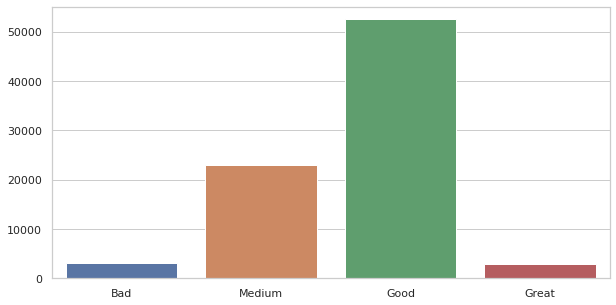

In [46]:
plt.figure(figsize=(10, 5))
sea.set_theme(style="whitegrid")
sea.barplot(y= ratings_disc.values, x= ratings_disc.index)
plt.show()

## Remoção de outliers

A coluna de votos segue uma distribuição exponencial ou próximo a uma exponencial. Eu percebi que remover outliers com essa distribuição é um pouco difícil porque a maior parte dos valores estão sempre concentrados do lado esquerdo, além disso os métodos para remoção de outliers univariados requerem uma distribuição simétrica.
Porém é possível utilizar uma estratégia multivariada como a isolation forest que não requer uma distribuição normal.

In [47]:
movies_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81273 entries, 0 to 81272
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   imdb_title_id             81273 non-null  category
 1   title                     81273 non-null  category
 2   year                      81273 non-null  int64   
 3   genre                     81273 non-null  category
 4   duration                  81273 non-null  int64   
 5   country                   81273 non-null  category
 6   language                  81273 non-null  category
 7   director                  81273 non-null  category
 8   writer                    81273 non-null  category
 9   production_company        81273 non-null  category
 10  actors                    81273 non-null  category
 11  avg_vote                  81273 non-null  float64 
 12  votes                     81273 non-null  float64 
 13  mean_vote                 81273 non-null  floa

In [48]:
# A copia para não perder dados importantes
mr = movies_ratings.copy()

In [49]:
movies_ratings['imdb_title_id'] = movies_ratings['imdb_title_id'].cat.codes
movies_ratings['title'] = movies_ratings['title'].cat.codes
movies_ratings['genre'] = movies_ratings['genre'].cat.codes
movies_ratings['country'] = movies_ratings['country'].cat.codes
movies_ratings['language'] = movies_ratings['language'].cat.codes
movies_ratings['director'] = movies_ratings['director'].cat.codes
movies_ratings['writer'] = movies_ratings['writer'].cat.codes
movies_ratings['production_company'] = movies_ratings['production_company'].cat.codes
movies_ratings['actors'] = movies_ratings['actors'].cat.codes
movies_ratings['avg_vote_disc'] = movies_ratings['avg_vote_disc'].cat.codes


In [51]:
from sklearn.ensemble import IsolationForest
rng = np.random.RandomState(42)
clf = IsolationForest(max_samples=100, random_state=rng)
clf.fit(movies_ratings)

IsolationForest(max_samples=100,
                random_state=RandomState(MT19937) at 0x7FDCC14D9780)

In [52]:
scores = clf.predict(movies_ratings)

In [53]:
mr['outlier'] = scores

In [54]:
mr[mr['outlier']==-1]

,imdb_title_id,title,year,genre,duration,country,language,director,writer,production_company,...,avg_vote,votes,mean_vote,median_vote,males_allages_avg_vote,males_allages_votes,females_allages_avg_vote,females_allages_votes,avg_vote_disc,outlier
0,tt0000574,The Story of the Kelly Gang,1906,"Biography, Crime, Drama",70,Australia,Missing,Charles Tait,Charles Tait,J. and N. Tait,...,6.1,0.000203,6.3,6.0,6.1,0.000286,6.100000,0.000178,Good,-1
1,tt0001892,Den sorte drøm,1911,Drama,53,"Germany, Denmark",Missing,Urban Gad,"Urban Gad, Gebhard Schätzler-Perasini",Fotorama,...,5.9,0.000033,6.1,6.0,6.0,0.000095,5.700000,0.000059,Good,-1
2,tt0002101,Cleopatra,1912,"Drama, History",100,USA,English,Charles L. Gaskill,Victorien Sardou,Helen Gardner Picture Players,...,5.2,0.000149,5.2,5.0,5.0,0.000202,5.800000,0.000145,Medium,-1
3,tt0002130,L'Inferno,1911,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",Dante Alighieri,Milano Film,...,7.0,0.000889,6.9,7.0,7.0,0.001065,7.200000,0.000760,Good,-1
7,tt0002452,Independenta Romaniei,1912,"History, War",120,Romania,Missing,Aristide Demetriade,"Aristide Demetriade, Petre Liciu",Societatea Filmului de Arta Leon Popescu,...,6.7,0.000041,7.1,7.0,6.7,0.000105,6.700000,0.000074,Good,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81268,tt9903716,Jessie,2019,"Horror, Thriller",106,India,Telugu,Aswani Kumar V.,Aswani Kumar V.,Ekaa Art Production,...,7.2,0.000056,8.1,9.0,7.1,0.000071,5.800000,0.000063,Good,-1
81269,tt9905412,Ottam,2019,Drama,120,India,Malayalam,Zam,Rajesh k Narayan,Thomas Thiruvalla Films,...,7.8,0.000190,7.8,9.0,3.0,0.000003,6.063094,0.000000,Great,-1
81270,tt9905462,Pengalila,2019,Drama,111,India,Malayalam,T.V. Chandran,T.V. Chandran,Benzy Productions,...,8.4,0.000234,8.1,9.0,4.0,0.000002,6.063094,0.000000,Great,-1
81271,tt9911774,Padmavyuhathile Abhimanyu,2019,Drama,130,India,Malayalam,Vineesh Aaradya,"Vineesh Aaradya, Vineesh Aaradya",RMCC Productions,...,8.4,0.000125,8.2,9.0,5.5,0.000001,6.063094,0.000000,Great,-1


In [55]:
movies_ratings = mr[mr['outlier'] != -1]
movies_ratings.shape

(61578, 21)

Os boxplots dos atributos de média e votos ainda mostram outliers. Pela própria distribuição das colunas de votos eu considero que não vale a pena mexer mais neles, principalmente porque não erros nos dados. 
Já os atributos de média, como vou precisar deles para fazeros testes de hipóteses, eu ainda preciso remover os outliers e irei fazer isso de forma univariada para cada um utilizando o método de tukey, já que eles seguem uma distribuição razoavelmente normal.

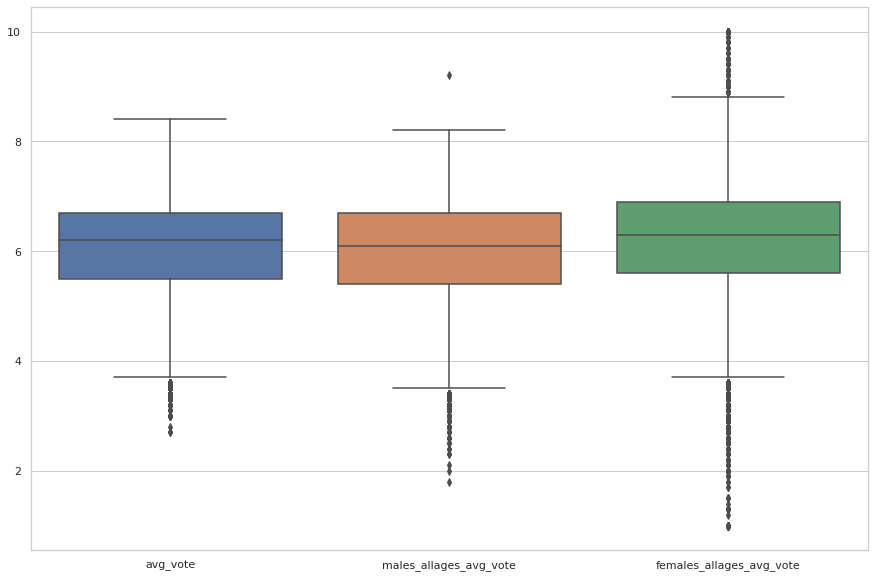

In [56]:
plt.figure(figsize=(15,10))
sea.boxplot(data= movies_ratings[['avg_vote', 'males_allages_avg_vote', 'females_allages_avg_vote']])
plt.show()

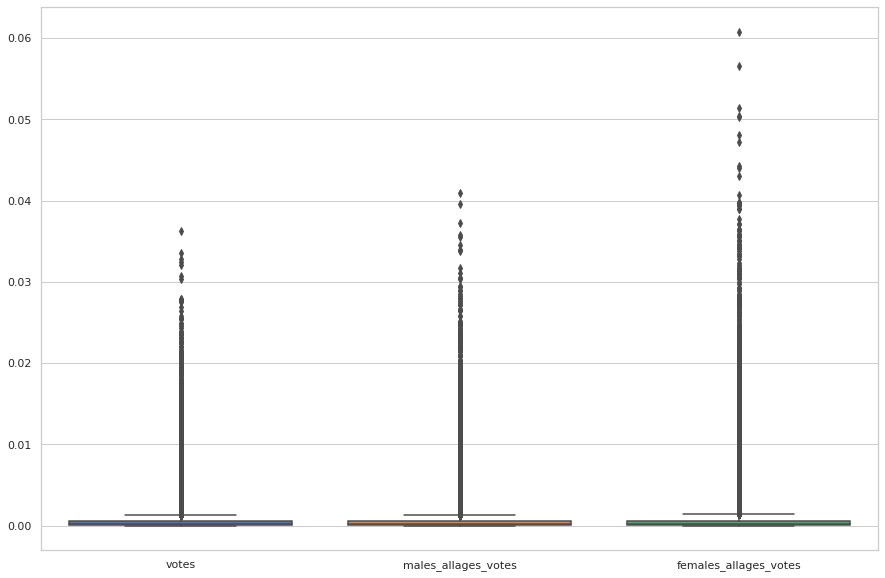

In [63]:
plt.figure(figsize=(15,10))
sea.boxplot(data= movies_ratings[['votes', 'males_allages_votes', 'females_allages_votes']])
plt.show()

<AxesSubplot:>

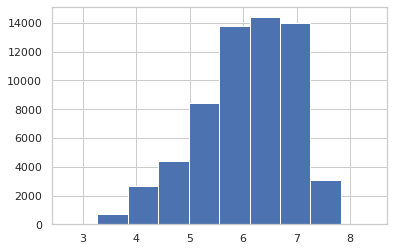

In [57]:
movies_ratings['avg_vote'].hist()

<AxesSubplot:>

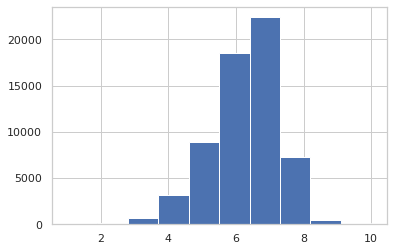

In [62]:
movies_ratings['females_allages_avg_vote'].hist()

<AxesSubplot:>

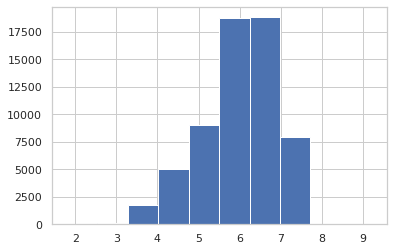

In [59]:
movies_ratings['males_allages_avg_vote'].hist()

In [64]:
#método de tukey
q1 = movies_ratings['avg_vote'].quantile(q=0.25)
q3 = movies_ratings['avg_vote'].quantile(q=0.75)
iqr = q3 - q1
print(iqr)


1.2000000000000002


In [65]:
movies_ratings[movies_ratings['avg_vote'] < (q1-1.5*iqr)]

,imdb_title_id,title,year,genre,duration,country,language,director,writer,production_company,...,avg_vote,votes,mean_vote,median_vote,males_allages_avg_vote,males_allages_votes,females_allages_avg_vote,females_allages_votes,avg_vote_disc,outlier
13570,tt0064726,Night of Bloody Horror,1969,Horror,89,USA,English,Joy N. Houck Jr.,"Joy N. Houck Jr., Robert A. Weaver",Cinema IV,...,3.6,1.018741e-04,4.0,4.0,3.5,0.000158,3.8,0.000107,Medium,1
14745,tt0068172,The Adult Version of Jekyll & Hide,1972,"Sci-Fi, Horror",92,USA,English,Lee Raymond,Robert Birch,El-Monde Productions,...,3.6,4.538027e-05,4.2,4.0,3.6,0.000104,3.5,0.000019,Medium,1
17937,tt0077987,Nicole,1976,Drama,91,USA,English,István Ventilla,"István Ventilla, Louis Horvath",Zephyr,...,3.4,1.852256e-06,4.3,4.0,3.4,0.000051,9.0,0.000015,Medium,1
18416,tt0079626,Night Creature,1978,"Adventure, Horror, Thriller",83,USA,English,Lee Madden,"Lee Madden, Hugh Smith",Lee Madden Associates,...,3.6,4.399107e-05,3.9,4.0,3.6,0.000094,5.4,0.000052,Medium,1
19322,tt0082620,Kiss Daddy Goodbye,1981,Horror,92,USA,English,Patrick Regan,"Alain Silver, Patrick Regan",Pendragon Film,...,3.6,6.343976e-05,4.1,3.0,3.5,0.000124,3.9,0.000070,Medium,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79919,tt8031130,Shadow Wolves,2019,"Action, Adventure, Thriller",95,"USA, UK",English,McKay Daines,McKay Daines,Caedmon Entertainment,...,3.5,9.724343e-06,4.3,4.0,3.5,0.000060,5.1,0.000041,Medium,1
80408,tt8483812,Mocking Of Christ,2018,Drama,152,"Republic of Macedonia, Greece, France",Macedonian,Jani Bojadzi,Jani Bojadzi,Candela,...,3.6,3.334060e-05,7.1,10.0,6.0,0.000060,5.6,0.000082,Medium,1
80478,tt8554826,Cheat the Hangman,2018,"Drama, Western",88,USA,English,Christopher Forbes,"Jezibell Anat, Christopher Forbes",ITN Films,...,3.4,9.261279e-07,5.5,5.0,2.6,0.000031,5.2,0.000026,Medium,1
80734,tt8861786,Puppy Star Christmas,2018,Family,91,USA,English,Robert Vince,"Robert Vince, Piers Rae",Air Bud Entertainment,...,3.5,2.315320e-06,4.3,4.0,3.4,0.000042,4.4,0.000063,Medium,1


In [66]:
movies_ratings[movies_ratings['avg_vote'] > (q3 + 1.5*iqr)]

,imdb_title_id,title,year,genre,duration,country,language,director,writer,production_company,...,avg_vote,votes,mean_vote,median_vote,males_allages_avg_vote,males_allages_votes,females_allages_avg_vote,females_allages_votes,avg_vote_disc,outlier


In [67]:
movies_ratings = movies_ratings[(movies_ratings['avg_vote'] > (q1 - 1.5*iqr)) & (movies_ratings['avg_vote'] < (q3 + 1.5*iqr)) ]
movies_ratings.sort_values(by='avg_vote')[['avg_vote', 'title']]

,avg_vote,title
64274,3.7,Bula Quo!
37553,3.7,Crocodile 2: Death Swamp
55172,3.7,Sovia
70507,3.7,Rey Gitano
50587,3.7,Minty: The Assassin
...,...,...
46108,8.1,Maha'lai muang rae
48577,8.1,Tatar Ramazan Sürgünde
42009,8.1,O vasilias
77274,8.2,Mr. Plinkett's Star Trek 2009 Review


<AxesSubplot:>

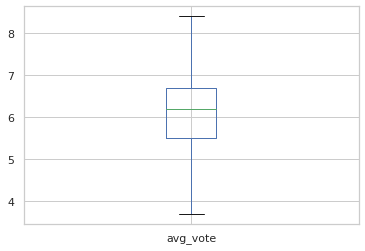

In [69]:
movies_ratings['avg_vote'].plot.box()

Agora para as mulheres

In [71]:
q1 = movies_ratings['females_allages_avg_vote'].quantile(q=0.25)
q3 = movies_ratings['females_allages_avg_vote'].quantile(q=0.75)
iqr = q3 - q1
iqr

1.3000000000000007

In [73]:
movies_ratings[movies_ratings['females_allages_avg_vote'] < (q1-1.5*iqr)][['title', 'females_allages_avg_vote']]

,title,females_allages_avg_vote
2683,Slave Ship,3.3
5874,"Federal Agents vs. Underworld, Inc.",3.4
8263,Checkpoint,2.3
9700,Tenemos 18 años,2.5
11885,Every Day's a Holiday,2.8
...,...,...
80676,Mar Gaye Oye Loko,3.3
80808,Kodathi Samaksham Balan Vakeel,3.0
80962,Ittymaani: Made in China,2.4
81015,Miszmasz czyli Kogel Mogel 3,3.2


In [74]:
movies_ratings[movies_ratings['females_allages_avg_vote'] > (q3 + 1.5*iqr)][['title', 'females_allages_avg_vote']]

,title,females_allages_avg_vote
5716,Sinister Journey,9.0
6651,New Mexico,10.0
7288,Jack Slade,9.8
8472,Si tous les gars du monde...,9.0
9909,Kemono no nemuri,10.0
...,...,...
80040,Last American Horror Show,9.0
80383,Pet Graveyard,9.0
80524,Kidu,10.0
81169,Natpe Thunai,9.5


In [75]:
movies_ratings = movies_ratings[(movies_ratings['females_allages_avg_vote'] > (q1-1.5*iqr)) & (movies_ratings['females_allages_avg_vote'] < (q3+1.5*iqr))]
len(movies_ratings)

60380

<AxesSubplot:>

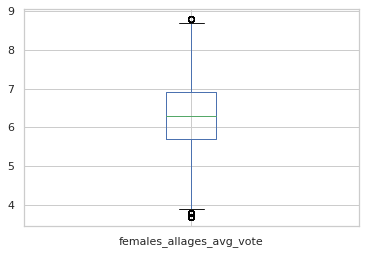

In [79]:
movies_ratings['females_allages_avg_vote'].plot.box()


Ainda sobraram alguns outliers então vou repetir o processo

<AxesSubplot:>

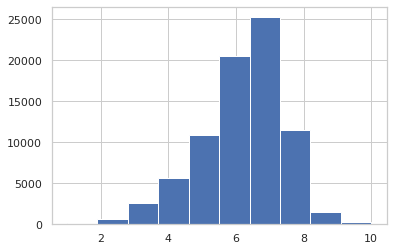

In [62]:
movies_ratings['females_allages_avg_vote'].hist()

In [88]:
q1 = movies_ratings['females_allages_avg_vote'].quantile(q=0.25)
q3 = movies_ratings['females_allages_avg_vote'].quantile(q=0.75)
iqr = q3 - q1
iqr

1.2000000000000002

In [90]:
movies_ratings = movies_ratings[(movies_ratings['females_allages_avg_vote'] > (q1-1.5*iqr)) & (movies_ratings['females_allages_avg_vote'] < (q3+1.5*iqr))]
len(movies_ratings)

59537

<AxesSubplot:>

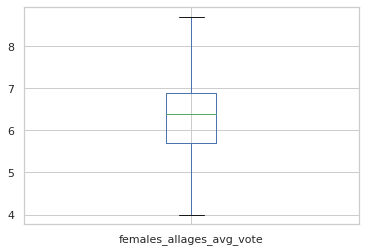

In [91]:
movies_ratings['females_allages_avg_vote'].plot.box()

Agora para os homens

In [92]:
q1 = movies_ratings['males_allages_avg_vote'].quantile(q=0.25)
q3 = movies_ratings['males_allages_avg_vote'].quantile(q=0.75)
iqr = q3 - q1
iqr

1.2000000000000002

In [93]:
movies_ratings = movies_ratings[(movies_ratings['males_allages_avg_vote'] > (q1-1.5*iqr)) & (movies_ratings['males_allages_avg_vote'] < (q3+1.5*iqr))]
len(movies_ratings)

59537

<AxesSubplot:>

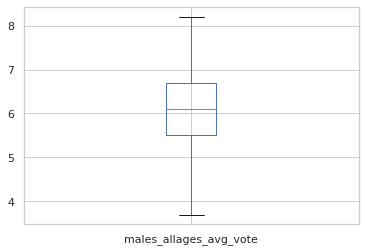

In [94]:
movies_ratings['males_allages_avg_vote'].plot.box()

## Visualização de dados


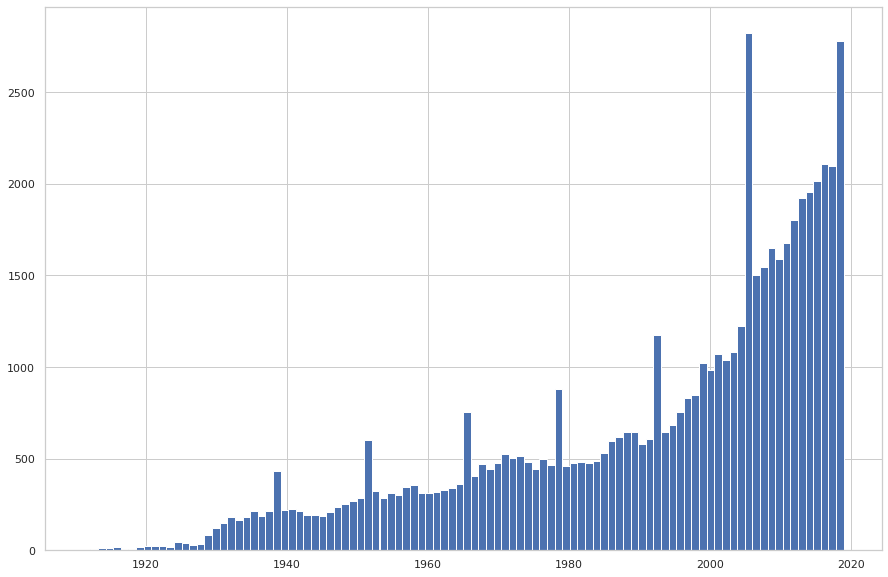

In [95]:
#distribuição de filmes lançados ao longo dos anos 
plt.figure(figsize=(15, 10))
plt.hist(movies_ratings['year'], bins=100)
plt.show()

In [96]:
#média dos ratings dos filmes em relação ao gênero

#peguei só o primeiro gênero de cada filme para comparar

movies_ratings['first_genre'] = movies.genre.str.split(',').str[0]
movies_ratings.first_genre.value_counts()

Drama          19442
Comedy         18090
Action          6548
Crime           4176
Horror          2399
Adventure       2309
Biography       1441
Animation       1395
Thriller         892
Romance          554
Western          494
Family           483
Mystery          403
Fantasy          298
Musical          230
Sci-Fi           186
War               60
History           55
Music             48
Film-Noir         23
Sport              9
Documentary        2
Name: first_genre, dtype: int64

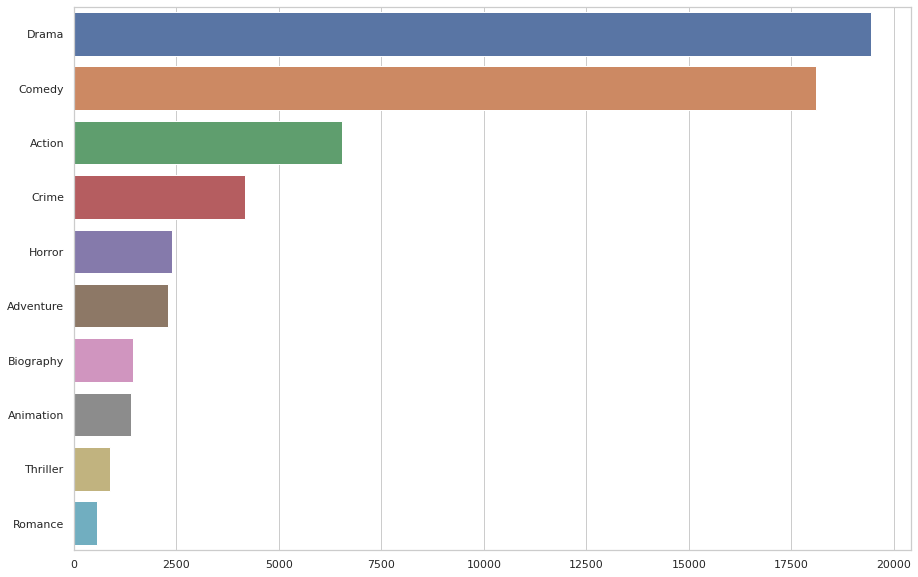

In [97]:
most_popular_genres = movies_ratings.first_genre.value_counts()[:10]
#barplot dos 10 gêneros mais populares
plt.figure(figsize=(15, 10))
sea.set_theme(style="whitegrid")
sea.barplot(x= most_popular_genres.values, y =most_popular_genres.index)
plt.show()


Eu achei estranho o gênero romance estar tão abaixo nos números, o que pode significar que somente o primeiro gênero não seja o suficiente para definir a temática do filme, então decidir pegar os dois primeiros gêneros, mais do que isso geraria um subconjuntos demais.

In [100]:
try:
    movies_ratings['genre_subset'] = list(map(",".join, movies_ratings.genre.str.split(',').str[:2]))
except:
    movies_ratings['genre_subset'] = movies_ratings.genre.str.split(',').str[0]
       


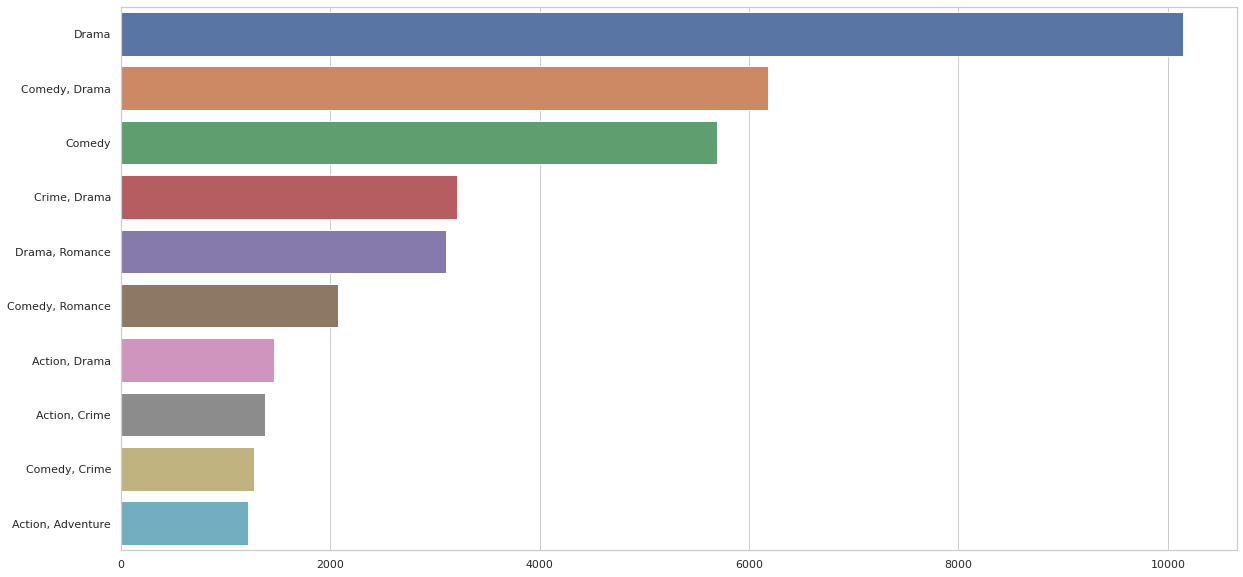

In [101]:
most_popular_genres = movies_ratings.genre_subset.value_counts()[:10]
#barplot dos 10 gêneros mais populares
plt.figure(figsize=(20, 10))
sea.set_theme(style="whitegrid")
sea.barplot(x= most_popular_genres.values, y =most_popular_genres.index)
plt.show()

Agora parece mais significativo, mostrando comédias românticas e comédias drámaticas, entre outros como gêneros populares


Abaixo mais dez subconjuntos de gêneros populares completando 20 ao todo.


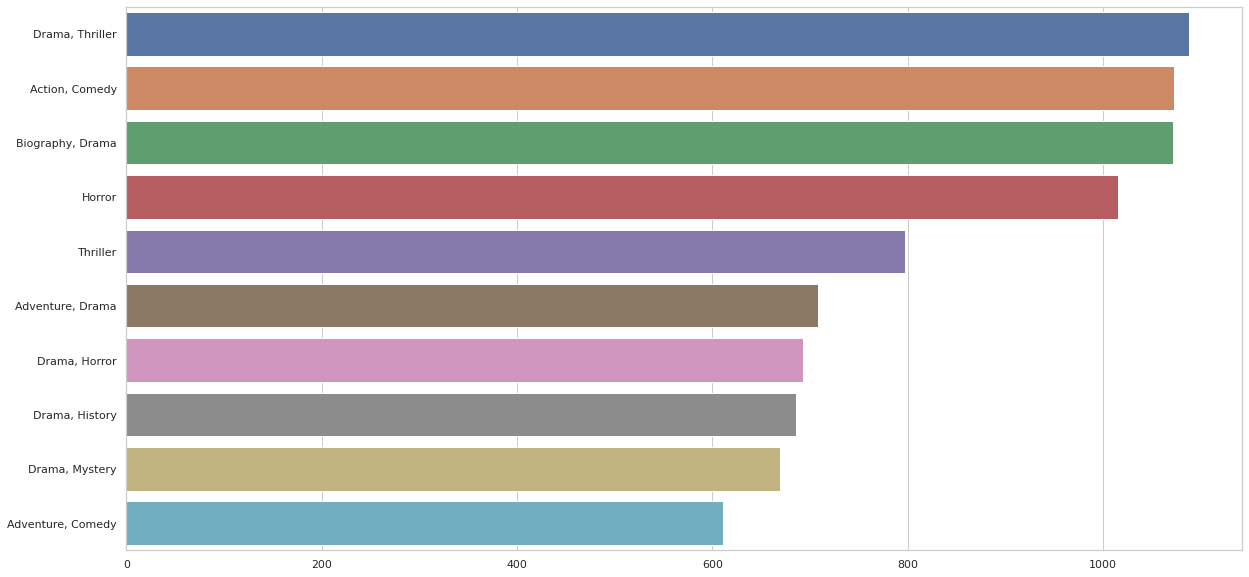

In [102]:
less_popular_genres = movies_ratings.genre_subset.value_counts()[10:20]
#barplot dos 10 gêneros mais populares
plt.figure(figsize=(20, 10))
sea.set_theme(style="whitegrid")
sea.barplot(x= less_popular_genres.values, y =less_popular_genres.index)
plt.show()

<Figure size 1080x720 with 0 Axes>

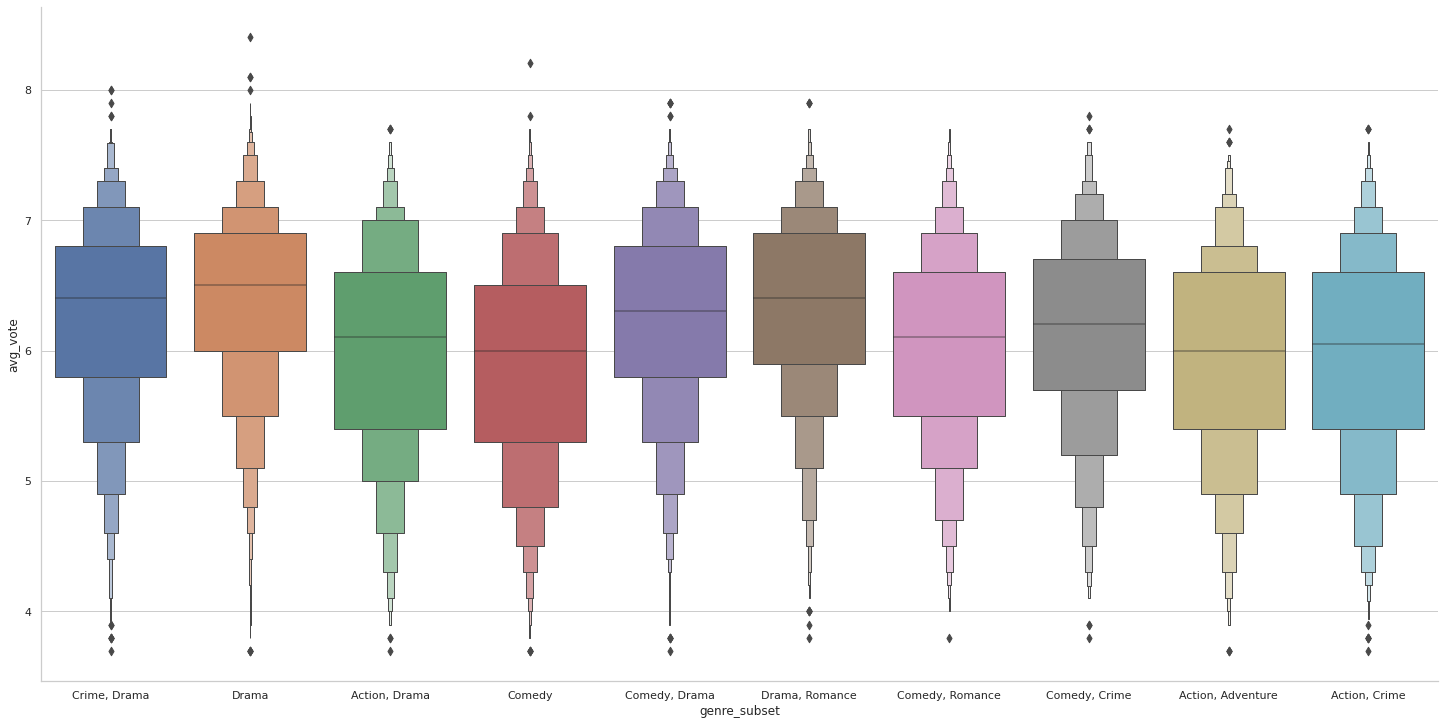

In [103]:
# O boxen é um tipo diferente de boxplot, mostra melhor como é a distribuição entre os quartis
top_genres = list(most_popular_genres.index)
df1 = movies_ratings[movies_ratings.genre_subset.isin(top_genres)]
plt.figure(figsize=(15,10))
sea.catplot(x='genre_subset', y = 'avg_vote', kind='boxen',height=10, aspect=2, data = df1)
plt.show()

<Figure size 1080x720 with 0 Axes>

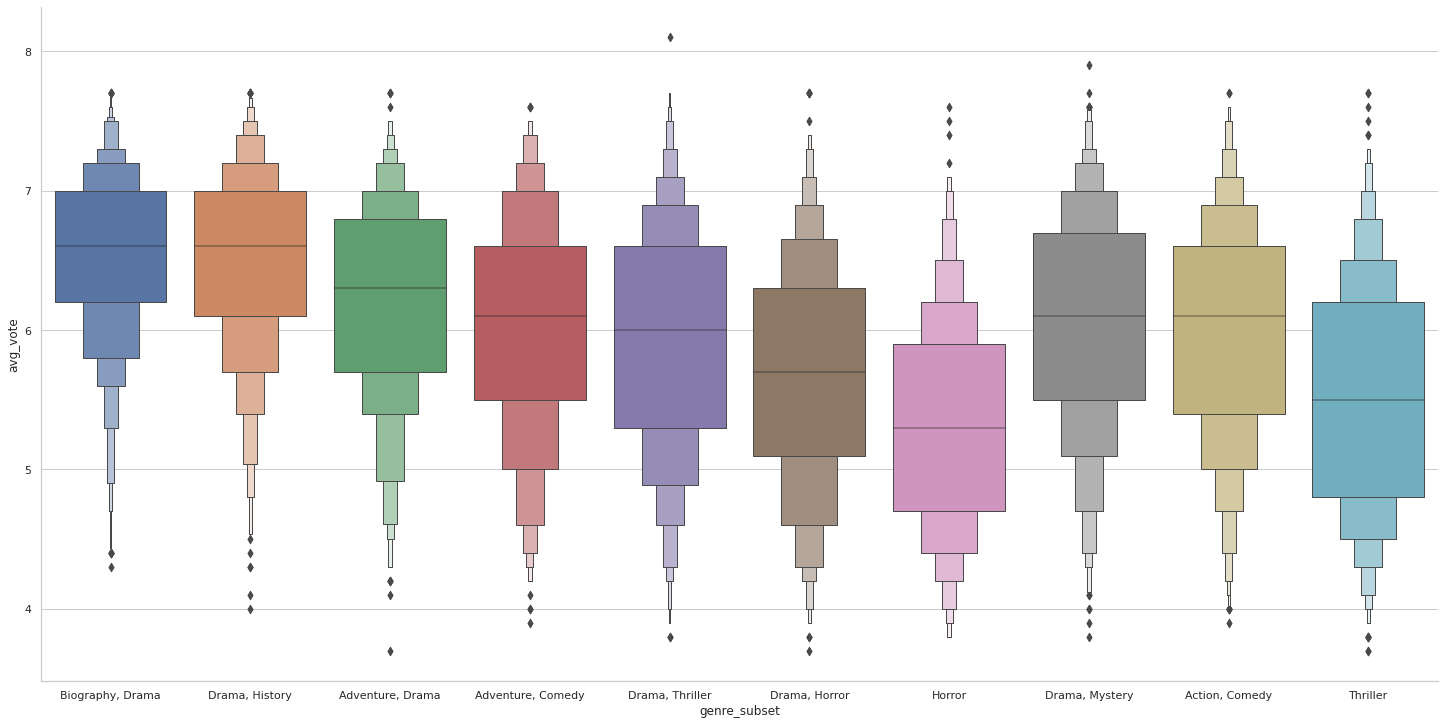

In [104]:
bottom_genres = list(less_popular_genres.index)
df2 = movies_ratings[movies_ratings.genre_subset.isin(bottom_genres)]
plt.figure(figsize=(15,10))
sea.catplot(x='genre_subset', y = 'avg_vote', kind='boxen',height=10, aspect=2, data = df2)
plt.show()

In [111]:
df1 = movies_ratings[movies_ratings.genre_subset.isin(top_genres)]

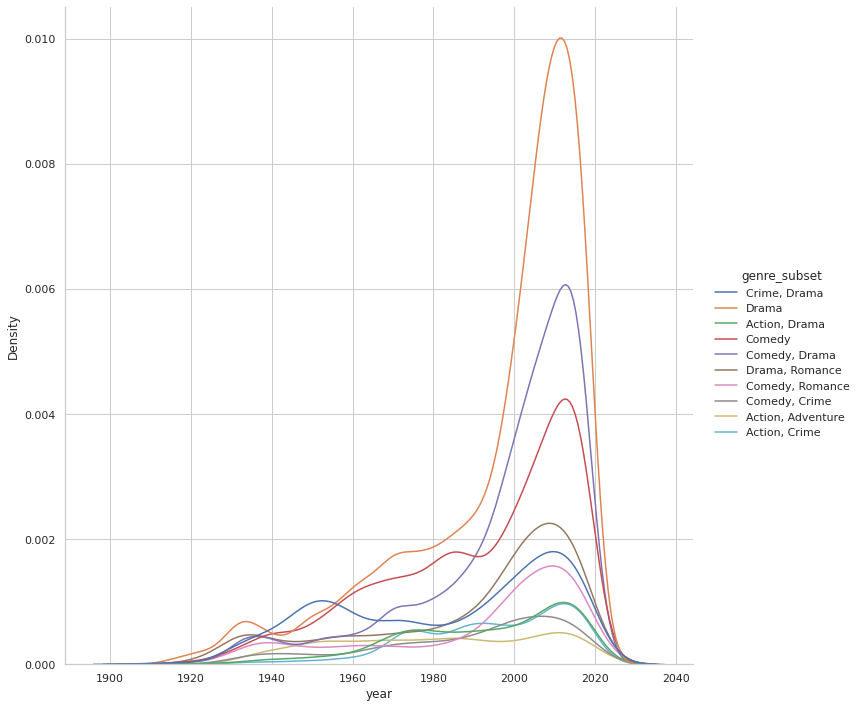

In [113]:
sea.displot(df1, x='year', hue = 'genre_subset', kind='kde', height=10)

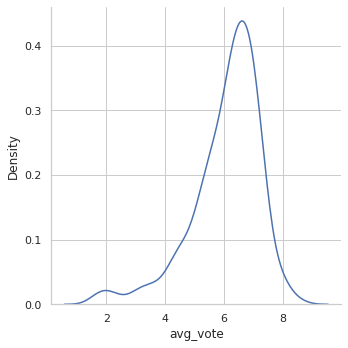

In [116]:
brasileiros = movies[movies.country.str.match("^Brazil\.*", na=False)]

sea.displot(brasileiros, x='avg_vote', kind='kde')

array([[<AxesSubplot:title={'center':'year'}>]], dtype=object)

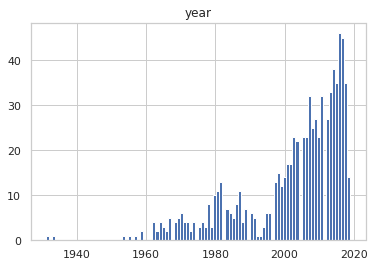

In [118]:
brasileiros.hist('year', bins=100)

## Testes de Hipótese


1º Teste: Comparar média dos votos de homens e mulheres 


É um teste pareado, eu vou pegar a mesma amostra em situações diferentes: médias dos votos de homens e mulheres.
É preciso checar se a difereça entre as amostras segue ou não uma distribuição normal para decidir qual teste será feito: O t teste pareado ou o wilcoxon test.

Como meu dataset é muito grande, vou pegar amostras de tamanho 10000 para realizar o teste de kolmorogov-smirnov para testar a normalidade. 

(Nesse caso eu realmente fiquei em dúvida se devia usar o dataset inteiro, mas decidi considerar o dataset como população e escolher uma amostra aleatória)

In [247]:
from random import sample

In [248]:
s = sample(list(movies_ratings['imdb_title_id']), 10000)

In [249]:
amostra = movies_ratings[movies_ratings.imdb_title_id.isin(s)]

<AxesSubplot:>

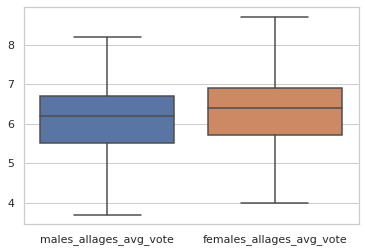

In [250]:
#Não pode haver outliers
sea.boxplot(data= amostra[['males_allages_avg_vote', 'females_allages_avg_vote']])

In [251]:
amostra['avg_votes_df'] = (amostra['females_allages_avg_vote'] - amostra['males_allages_avg_vote'])

/home/carolina/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [252]:
amostra[['females_allages_avg_vote','males_allages_avg_vote', 'avg_votes_df']]

,females_allages_avg_vote,males_allages_avg_vote,avg_votes_df
20,6.9,6.5,0.4
36,6.0,5.8,0.2
42,5.8,5.7,0.1
46,6.3,6.4,-0.1
47,6.9,6.6,0.3
...,...,...,...
81243,6.5,5.9,0.6
81245,4.6,6.0,-1.4
81250,7.0,7.4,-0.4
81251,5.8,6.7,-0.9


<AxesSubplot:>

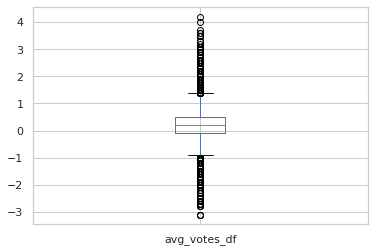

In [253]:
#não pode haver outliers
amostra['avg_votes_df'].plot.box()

O teste de kolmorogov-smirnov é sensível a outliers então vou removê-los com o método de tukey.

In [254]:
q1 = amostra['avg_votes_df'].quantile(q=0.25)
q3 = amostra['avg_votes_df'].quantile(q=0.75)
iqr = q3 - q1
iqr

0.5999999999999996

In [255]:
amostra = amostra[(amostra['avg_votes_df'] > (q1-1.5*iqr)) & (amostra['avg_votes_df'] < (q3+1.5*iqr))]
len(amostra)

9263

<AxesSubplot:>

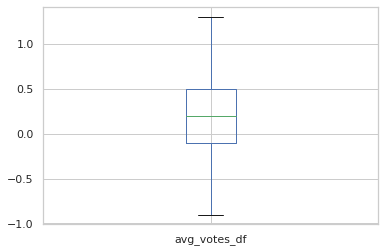

In [257]:
amostra['avg_votes_df'].plot.box()

In [262]:
s, p = st.kstest(amostra['avg_votes_df'], 'norm')
print(s)
# Se p for menor que 0.05 rejeitamos a hipótese nula de que a distribuição é normal
p < 0.05


0.27791066568754497


True

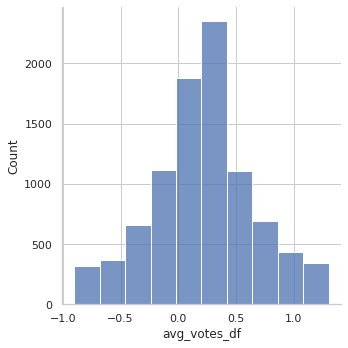

In [259]:
sea.displot(amostra['avg_votes_df'], bins=10)

O histograma mostra uma distribuição bastante parecida com uma normal. Eu decidi usar um QQplot pra ficar mais claro

In [213]:
import pylab 

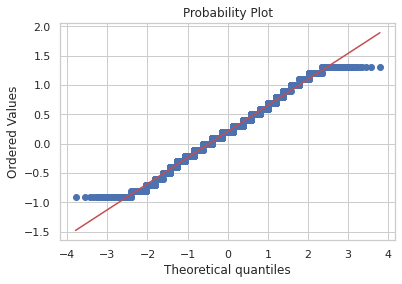

In [260]:
st.probplot(amostra['avg_votes_df'], dist="norm", plot=pylab)
pylab.show()

Para termos uma distribuição normal os pontinhos azuis precisam seguir a linha vermelha e temos um desvio nas extremidades, logo não é normal.

Então o teste utilizado será o Wilcoxon

In [ ]:
s, p = st.wilcoxon(amostra['females_allages_avg_vote'], amostra['males_allages_avg_vote'])
p < 0.05

Realmente a distribuição da diferença não é simétrica em relação a 0 como podemos ver no boxplot.

<AxesSubplot:>

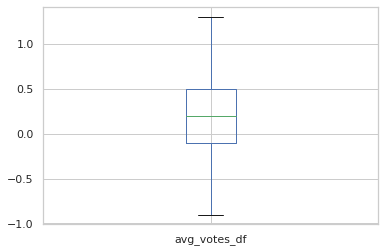

In [271]:
amostra['avg_votes_df'].plot.box()

2º Teste

Quero comparar as distribuições das médias para filmes de drama e comédia. O teste é não pareado porque os indivíduos são diferentes.

Vou continuar com a amostra utilizada no teste anterior.

In [273]:
amostra.first_genre.value_counts()

Drama          3101
Comedy         2809
Action          948
Crime           660
Horror          364
Adventure       351
Biography       226
Animation       225
Thriller        138
Romance          85
Western          72
Family           71
Mystery          62
Musical          49
Fantasy          48
Sci-Fi           20
Music            12
War               9
History           8
Film-Noir         3
Documentary       1
Sport             1
Name: first_genre, dtype: int64

As observações precisam ter o mesmo tamanho

In [282]:
drama = amostra[amostra.first_genre=='Drama'][:2800]
drama.shape

(2800, 24)

In [283]:
comedia = amostra[amostra.first_genre=='Comedy'][:2800]
comedia.shape

(2800, 24)

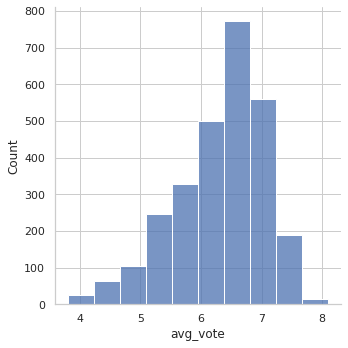

In [285]:
sea.displot(drama['avg_vote'], bins=10)

Desta vez eu vou utilizar o teste de shapiro já que a amostra é pequena.

In [292]:
s, p = st.shapiro(drama['avg_vote'])
# Se p for menor que 0.05 rejeitamos a hipótese de que a distribuição é normal
p < 0.05

True

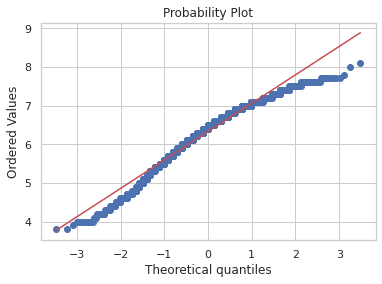

In [293]:
st.probplot(drama['avg_vote'], dist="norm", plot=pylab)
pylab.show()

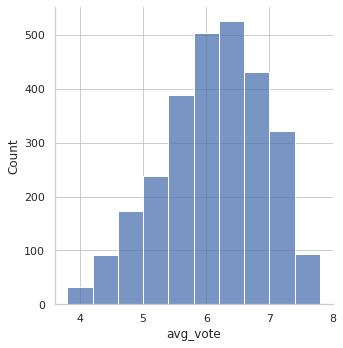

In [286]:
sea.displot(comedia['avg_vote'], bins=10)

In [291]:
s, p = st.shapiro(comedia['avg_vote'])
# Se p for menor que 0.05 rejeitamos a hipótese de que a distribuição é normal
p < 0.05

True

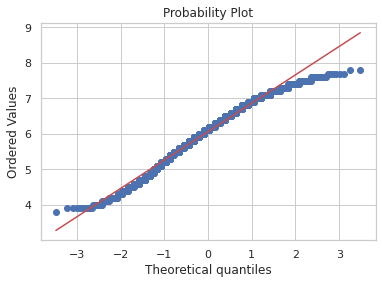

In [294]:
st.probplot(comedia['avg_vote'], dist="norm", plot=pylab)
pylab.show()

Nesse caso, o teste utilizado será o Mann Whitney para 2 grupos não pareados

In [301]:
s, p = st.mannwhitneyu(drama['avg_vote'], comedia['avg_vote'])
print(s)
print(p)

# Se p for menor que 0.05, rejeitamos a hipótese de que as amostras vem de populações com mesma distribuição.
p < 0.05

3159549.0
1.347357237061849e-36


True

<AxesSubplot:>

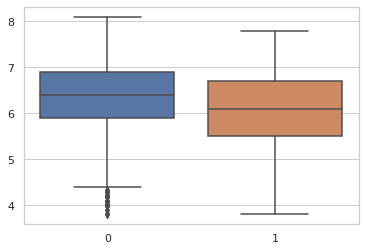

In [302]:
sea.boxplot(data = [drama['avg_vote'], comedia['avg_vote']])